# Predicting Probability of Graduate Admission with a Logisitic Regression

In [27]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Load Data:

* Admit: Binary (0 = Not admitted, 1 = Admitted)
* gre: GRE test score
* gpa: Grade Point Average
* rank: Rank of undergraduate university (1-4, Most prestigous to least)

In [28]:
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

In [29]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [30]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [31]:
print pd.crosstab(df['admit'], df['rank'], rownames=['admit'])

rank    1   2   3   4
admit                
0      28  97  93  55
1      33  54  28  12


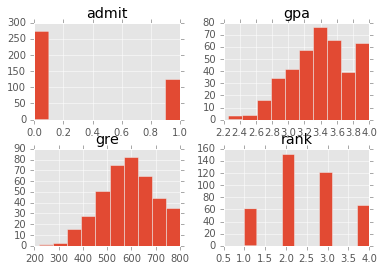

In [32]:
df.hist()
plt.show()

In [33]:
dummy_rank = pd.get_dummies(df['rank'], prefix="rank")

In [34]:
cols = ['admit', 'gpa', 'gre']
data = df[cols].join(dummy_rank.ix[:, 'rank_2':])
print data.head()

   admit   gpa  gre  rank_2  rank_3  rank_4
0      0  3.61  380       0       1       0
1      1  3.67  660       0       1       0
2      1  4.00  800       0       0       0
3      1  3.19  640       0       0       1
4      0  2.93  520       0       0       1


In [35]:
data['intercept'] = 1.0

In [36]:
train = data.columns[1:]

logit = sm.Logit(data['admit'], data[train])
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Mon, 20 Mar 2017   Pseudo R-squ.:                 0.08292
Time:                        21:13:30   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gpa            0.8040      0.332      2.423      0.015         0.154     1.454
gre            0.0023      0.

## Odds Ratio

In [43]:
odds = np.exp(result.params)
odds

gpa          2.234545
gre          1.002267
rank_2       0.508931
rank_3       0.261792
rank_4       0.211938
intercept    0.018500
dtype: float64

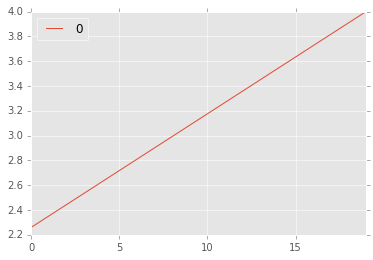

In [53]:
gre_data = np.linspace(data['gre'].min(), data['gre'].max(), 20)
gpa_data = np.linspace(data['gpa'].min(), data['gpa'].max(), 20)